In [64]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set_style('whitegrid')

# Problem definition

In [65]:
# Apply regression models to predict the Product Family sales along with the market segment

# Load the data

In [66]:
#input
df_sales = pd.read_csv('/Users/jeromepotvin/Desktop/PERSONNEL JEROME/CONCORDIA/1260_BIG DATA/PROJECT/DATA/RAW/1_FINAL CUSTOMER SALES_16_17.csv')
print(df_sales.columns)
df_sales.head()

Index(['Customer_Name ', 'Product_Family_Desc', 'Ship_Type', 'Order Type',
       'Customer_Address ', 'Market_Segment_Desc ', 'Supplier_Name', '2016',
       '2017'],
      dtype='object')


,Customer_Name,Product_Family_Desc,Ship_Type,Order Type,Customer_Address,Market_Segment_Desc,Supplier_Name,2016,2017
0,* INVENTAIRE REEL,WIRE & CABLE,1,A,"SAINT-LAURENT, H4T1X7",OTHER,SPOOLON MFG LTD,"$2,011.52","$3,017.28"
1,* INVENTAIRE USAGE ADMIN.,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,COLUMBIA/MBF,$41.19,NaN
2,* INVENTAIRE USAGE ADMIN.,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,REXEL CANADA ELECTRICAL INC.,$29.87,$4.35
3,* INVENTAIRE USAGE ADMIN.,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,THOMAS & BETTS,NaN,$22.27
4,* INVENTAIRE USAGE ADMIN.,"CONNECT, FITT & OUT/BOXES",1,A,"SAINT-LAURENT, H4T1X7",OTHER,3M CDA INC,$13.00,NaN


# Feature Engineering 

In [67]:
# Cleaning according to the data dictionary
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
print(len(df_sales))
# X2: Product Family Desc (1 = WIRE_CABLE; 2 = CONDUIT_ACCESSORIES; 3 = CONNECT_FITT_OUTBOXES; 4 = DATACOM; 5 = DISTRIBUTION_FUSES; 6 = HEATING_PRODUCTS; 7 = LIGHTING; 8 = MOTOR_CONTROLS_AUTOMATION; 9 = OTHER_PRODUCTS; 10 = SECURITY_PRODUCTS; 11 = TOOLS). 
df_sales = df_sales[df_sales['Product_Family_Desc'].isin([1,2,3,4,5,6,7,8,9,10,11])]
# X3: Market Segment Desc (1 = COMMERCIAL CONTRACTOR; 2 = DATA CONTRACTORS; 3 = RESIDENTIAL CONTRACTOR; 4 = INDUSTRIAL CONTRACTOR). 
df_sales = df_sales[df_sales['Market_Segment_Desc '].isin([1,2,3,4])]
#X4: Ship Type (1 = WH; 2 = NLI; 3 = Project). 
df_sales = df_sales[df_sales['Ship_Type'].isin([1,2,3])]
print(len(df_sales))

144468
0


In [74]:
# Product Family Desc, Market Segment Desc , Ship Type  to numerical columns
df_sales['Product_Family_Desc'] = pd.get_dummies(df['Product_Family_Desc'])
df_sales['Product_Family_Desc'].columns = ['WIRE & CABLE', 'CONDUIT & ACCESSORIES', 'CONNECT FITT OUTBOXES', 'DATACOM', 'DISTRIBUTION & FUSES', 'HEATING PRODUCTS', 'LIGHTING', 'MOTOR CONTROLS AUTOMATION', 'OTHER PRODUCTS', 'SECURITY PRODUCTS', 'TOOLS']
df_sales['Market_Segment_Desc '] = pd.get_dummies(df['Market_Segment_Desc '])
df_sales['Market_Segment_Desc '].columns = ['COMMERCIAL CONTRACTOR','DATA CONTRACTORS','RESIDENTIAL CONTRACTOR','INDUSTRIAL CONTRACTOR']
df_sales['Ship_Type'] = pd.get_dummies(df['Ship_Type'])
df_sales['Ship_Type'].columns = ['1 = WH','2 = NLI','3 = Project']
df_sales = pd.concat([df_Product_Family_Desc, df_Market_Segment_Desc , df_Ship_Type], axis=1)
df.head()

NameError: name 'df' is not defined

In [71]:
# Remove not necessary columns
del df_sales['Product_Family_Desc']
del df_sales['Market_Segment_Desc ']
del df_sales['Ship_Type']

KeyError: 'Product_Family_Desc'

In [53]:
# feature engineering
X_columns = df_sales.columns[:-1]
y_column = df_sales.columns[-1]

# Model Training

In [54]:
# split the data

threshold = 0.8
X = df_sales[X_columns]
y = df_sales[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (0, 5)
y_train (0,)
X_test (0, 5)
y_test (0,)


# Model Training / Evaluation - Using Split

In [55]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

# Model Training / Evaluation - Cross Validation

In [14]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)

MODEL Naive Bayes


ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: 0.

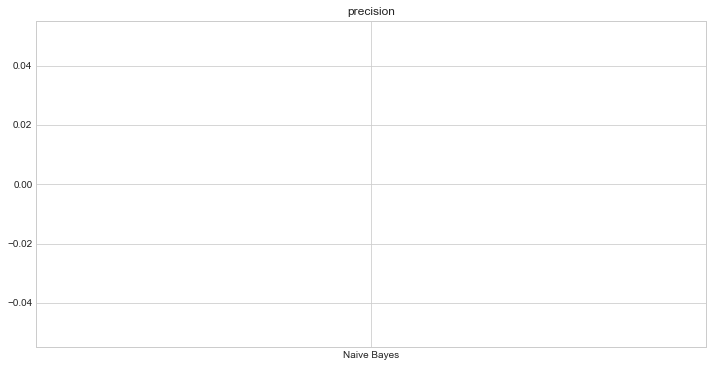

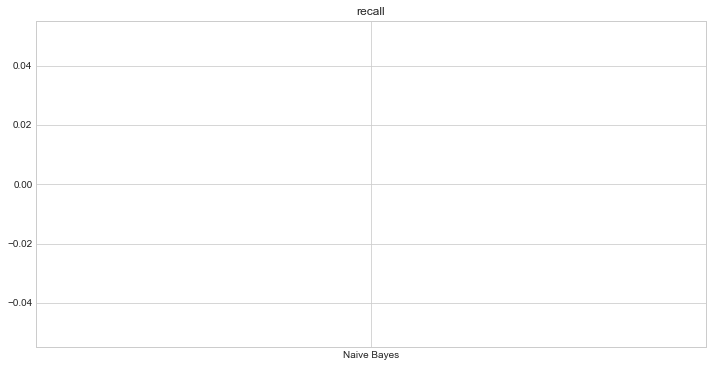

In [15]:
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()